# Game of Life


The [Game of Life](http://en.wikipedia.org/wiki/Conway's_Game_of_Life) (GoF) is a cellular automaton devised by the British mathematician John Horton Conway in 1970. The game is a zero-player game, meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves, or, for advanced players, by creating patterns with particular properties.

The universe of the Game of Life is an infinite two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead. Every cell interacts with its eight neighbours, which are the cells that are directly horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

* Any live cell with fewer than two live neighbours dies, as if by underpopulation.
* Any live cell with more than three live neighbours dies, as if by overcrowding.
* Any live cell with two or three live neighbours lives, unchanged, to the next generation.
* Any dead cell with exactly three live neighbours becomes a live cell.

The initial pattern (generation 0) constitutes the "seed" of the system.
Time is considered discrete, and each time step (sometimes called a tick), the previous rules are applied simultaneously to every cell in the grid; "births" and "deaths" are immediate.
Each generation is a pure function of the previous generation alone.


## Assignments

* Begin by implementing the GoF's rules and create few examples with basic seeds in small dimensions. Hint: create `.gif` animations from sequences of still `.png` images
* Implement examples of the three categories of patterns *still lifes*, *oscillators* and *spaceships* (check the [wiki link](http://en.wikipedia.org/wiki/Conway's_Game_of_Life))
* Analyse the evolutions of these patterns in terms of frequency (the number of cycles required to return to the original configuration, if any), occupancy (how many alive cells there are at every step of the game), replication or heat (the average number of cells that change state at each generation), speed (if applicable), etc.
* Increase the size of the GoF's world and play with more advanced and complex patterns

In [253]:
import math
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from PIL import Image
from IPython.display import HTML, display
%matplotlib inline
import matplotlib.animation as animation
import warnings
warnings.filterwarnings('ignore')

## Create Starting Grid

* Takes a initial pattern, grid size (N) and creates a grid by placing the pattern in the center of the grid
* If the pattern size is greater than N, N = size of pattern

In [254]:
def createStartingGrid(state, N = 50):
    n = len(state)
    if n > N: N = n
    grid = np.zeros((N,N), dtype = int)
    grid_mid = int(N/2)
    patt_mid = int(n/2)
    if n % 2 == 0:
        grid[grid_mid-patt_mid:grid_mid+patt_mid,grid_mid-patt_mid:grid_mid+patt_mid] = state
    else:
        grid[grid_mid-patt_mid:grid_mid+patt_mid+1,grid_mid-patt_mid:grid_mid+patt_mid+1] = state
    return grid

## Count Cell Neighbours

* Takes cell position in our grid (i,j), grid size (N) and the grid as input
* Returns the number of live neighbours

In [255]:
def neighbourCount(i,j,N,state = None):
    count = 0
    if type(state) == 'numpy.ndarray':
        return None
    else:
        nei = []
    # Iterate over the cells in the 3x3 area surrounding the cell
        for c in product(*(range(n-1, n+2) for n in (i,j))):
            # Check if the cell is not the original cell and within the bounds of the grid
            if c != (i,j) and all(0 <= n < N for n in c):
                # Add the state of the cell to the list of live neighbors
                nei.append(state[c])
        # Return the sum of the live neighbors
        return np.sum(nei)



## Calculate Next Generation

* Takes the initial grid and return a new grid with the next generation

In [256]:
def nextGeneration(init_state):
    state = init_state.copy()
    grid_size = len(state)
    next_gen = (np.random.randint(1,size = grid_size**2)).reshape(grid_size,grid_size)
    for i in range(grid_size):
        for j in range(grid_size):
            neigh = neighbourCount(i,j,grid_size,state)
            if(neigh == 3 and state[i,j] == 0):
                next_gen[i,j] = 1
            elif((neigh == 2 or neigh == 3) and state[i,j] == 1):
                next_gen[i,j] = 1
            else:
                next_gen[i,j] = 0
    return next_gen
        


## Game of Life

* Returns the list of generation over a period of time, given the initial grid (`0th Generation`) as input.

In [257]:
def gameOfLife(state, period = 20):
        temp_state = state.copy()    
        grid_seq = [temp_state]
        grid_size = len(temp_state)
        curr_gen = temp_state
        for t in range(1,period):
            next_gen = nextGeneration(curr_gen)
            grid_seq.append(next_gen)
            curr_gen = next_gen
            if np.count_nonzero(next_gen) == 0:
                break
        return grid_seq

## Create Gifs
* Create gifs from the list of generations

In [258]:
def createGifs(gen_list,pattern_name):
    # Create new figure for GIF
    fig, ax = plt.subplots()
    # Adjust figure so GIF does not have extra whitespace
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
    ax.axis('off')
    ims = []

    for gen in gen_list:
        im = ax.imshow(gen)
        ims.append([im])
        
    plt.close()
    ani = animation.ArtistAnimation(fig, ims, interval=100)
    ani.save('./gifs/'+pattern_name+'.gif')

## Occupation

* Number of alive cells at each generation

In [259]:
def occupation(gen_list):
    count = []
    for gen in gen_list:
        count.append(np.count_nonzero(gen))
    fig, ax = plt.subplots()
    time_steps = np.linspace(0, len(count), len(count), endpoint=True)
    ax.plot(time_steps,count)
    ax.set_xlabel('Generation')
    ax.set_ylabel('No. of live cells')
    ax.set_title('Occupancy')
#     ax.set_xticks(range(0,len(count)+1))

## Frequency
* Number of cycles required to return to the original configuration

In [260]:
def periodOfRepetition(pattern,sequence):
    pat_len = len(pattern)
    pad = math.floor(pat_len/2)
    count = 0;
    for seq in sequence[1:]:
        temp_seq = np.pad(seq,pad)
        for i in range(0,len(temp_seq)-pad*2):
            for j in range(0,len(temp_seq)-pad*2):               
                temp = temp_seq[i:i+(pat_len),j:j+(pat_len)]
                if (temp == pattern).all():
#                     print('Emilija Queen')
                    return (count+1);
        count+=1
    return count

In [272]:
def frequency(period):
    if period==0:
        print('Does not return to original state over the lifetime of the universe.')
    else:
        print('Frequency:',1/period)

## Replication/Heat

* Number of cells that change state at each step

In [273]:
def replication(gen_list):
    heat = []
    for i in range(0,len(gen_list)-1):
        diff_result = gen_list[i] ^ gen_list[i+1]
        heat.append(np.count_nonzero(diff_result))
    heat = np.array(heat)
    fig, ax = plt.subplots()
    time_steps = np.linspace(1, len(heat), len(heat), endpoint=True)
    ax.plot(time_steps,heat)
    ax.set_xlabel('Generation')
    ax.set_ylabel('No. of cells changing state')
    ax.set_title('Replication')
    return heat.mean()

# Still Life
## 1. Block

In [283]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/block.gif">
</div>'''))

In [280]:
block = np.array([
    [1,1],
    [1,1]
    ])
block_grid = createStartingGrid(block)
block_gen_list = gameOfLife(block_grid)
createGifs(block_gen_list,'block')

MovieWriter ffmpeg unavailable; using Pillow instead.


Frequency: 1.0
No. of cycles to return to get to initial pattern: 1
Average no. of block cells changing state at each transition: 0.0


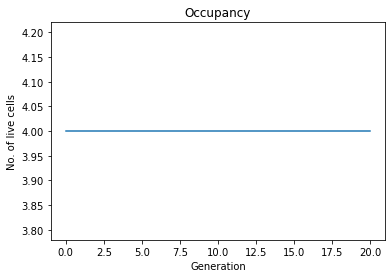

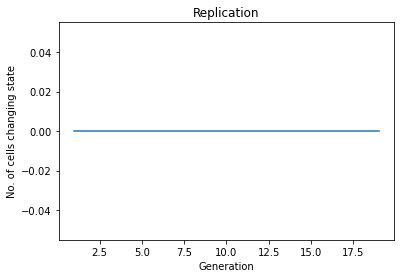

In [282]:
occupation(block_gen_list)
grad = replication(block_gen_list)
period = periodOfRepetition(block,block_gen_list)
frequency(period)

print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of block cells changing state at each transition:',grad)

## 2. Bee-hive

In [294]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/bee-hive.gif">
</div>'''))

In [292]:
bee_hive=np.array([
    [0,0,0,0],
    [0,1,1,0],
    [1,0,0,1],
    [0,1,1,0]
    ])
honeycomb = createStartingGrid(bee_hive)
hive_list = gameOfLife(honeycomb)
createGifs(hive_list,'bee-hive')

MovieWriter ffmpeg unavailable; using Pillow instead.


Frequency: 1.0
No. of cycles to return to get to initial pattern: 1
Average no. of block cells changing state at each transition: 0.0


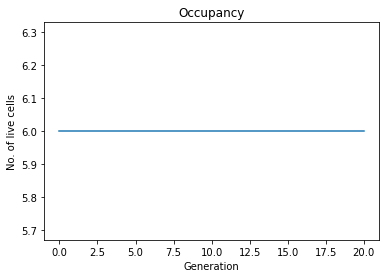

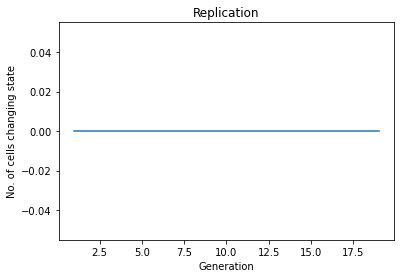

In [293]:
occupation(hive_list)
grad = replication(hive_list)
period = periodOfRepetition(bee_hive,hive_list)
frequency(period)

print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of block cells changing state at each transition:',grad)

# Oscillators

## 1. Toad

In [242]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/toad.gif">
</div>'''))

In [234]:
toad=np.array([
    [0,0,0,0],
    [0,1,1,1],
    [1,1,1,0],
    [0,0,0,0]
    ])
toad_grid = createStartingGrid(toad)
toad_list = gameOfLife(toad_grid)
createGifs(toad_list,'toad')

MovieWriter ffmpeg unavailable; using Pillow instead.


Frequency: 0.5
No. of cycles to return to get to initial pattern: 2
Average no. of cells changing state at each transition: 8.0


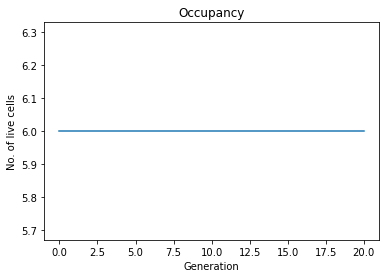

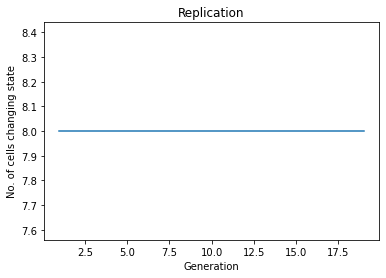

In [284]:
occupation(toad_list)
grad = replication(toad_list)
period = periodOfRepetition(toad,toad_list)
frequency(period)

print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of cells changing state at each transition:',grad)

## 2. Beacon 

In [285]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/beacon.gif">
</div>'''))

In [286]:
beacon=np.array([
    [1,1,0,0],
    [1,1,0,0],
    [0,0,1,1],
    [0,0,1,1]
    ])
beacon_grid = createStartingGrid(beacon)
beacon_list = gameOfLife(beacon_grid)
createGifs(beacon_list,'beacon')

MovieWriter ffmpeg unavailable; using Pillow instead.


Frequency: 0.5
No. of cycles to return to get to initial pattern: 2
Average no. of beacon cells changing state at each transition: 2.0


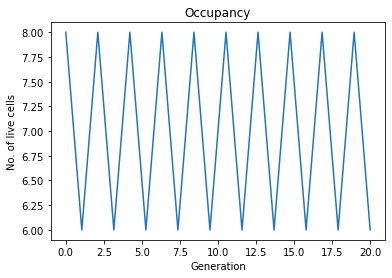

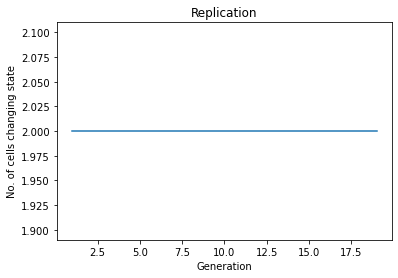

In [288]:
occupation(beacon_list)
grad = replication(beacon_list)
period = periodOfRepetition(beacon,beacon_list)
frequency(period)

print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of beacon cells changing state at each transition:',grad)

## 3. Pulsar

In [297]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/pulsar.gif">
</div>'''))

In [295]:
pulsar=np.array([
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,1,1,1,0,0],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [1,0,0,0,0,1,0,1,0,0,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,1,1,1,0,0]
    ])
pulsar_grid = createStartingGrid(pulsar)
pulsar_list = gameOfLife(pulsar_grid)
createGifs(pulsar_list,'pulsar')

MovieWriter ffmpeg unavailable; using Pillow instead.


Frequency: 0.3333333333333333
No. of cycles to return to get to initial pattern: 3
Average no. of beacon cells changing state at each transition: 43.36842105263158


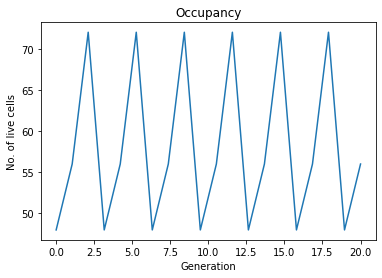

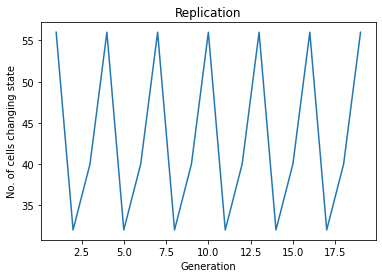

In [296]:
occupation(pulsar_list)
grad = replication(pulsar_list)
period = periodOfRepetition(pulsar,pulsar_list)
frequency(period)

print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of beacon cells changing state at each transition:',grad)

# Spaceships

## 1. Glider


In [289]:
display(HTML('''<div style="display: flex; justify-content: row;">
    <img src="./gifs/glider.gif">
</div>'''))

In [290]:
glider = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1]
    ])

glider_grid = createStartingGrid(glider)
glider_list = gameOfLife(glider_grid, period = 100)
createGifs(glider_list,'glider')

MovieWriter ffmpeg unavailable; using Pillow instead.


Frequency: 0.25
No. of cycles to return to get to initial pattern: 4
Average no. of glider cells changing state at each transition: 3.7676767676767677


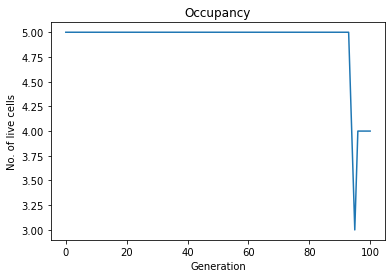

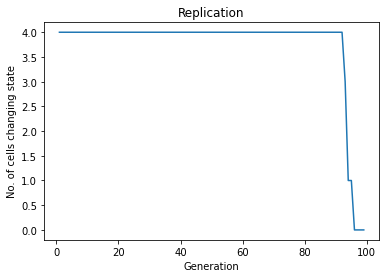

In [291]:
occupation(glider_list)
grad = replication(glider_list)
period = periodOfRepetition(glider,glider_list)
frequency(period)

print('No. of cycles to return to get to initial pattern:',period)
print('Average no. of glider cells changing state at each transition:',grad)